In [130]:
import pandas as pd
import sqlite3

In [131]:
con = sqlite3.connect("../data/checking-logs.sqlite.sqlite copy")

## analyze only the users and not the admins

In [132]:
df = pd.io.sql.read_sql("SELECT timestamp FROM checker WHERE uid LIKE 'user_%';", parse_dates=['timestamp'], con=con)
dt_bins = [0, 3, 9, 16, 23]
dt_labels = ['night', 'morning', 'afternoon', 'evening']
df['daytime'] = pd.cut(df['timestamp'].dt.hour, bins=dt_bins, labels=dt_labels, include_lowest = True, ordered=False)
df = df.groupby([df['timestamp'].dt.date, df['daytime']]).count()
df.rename(columns={'timestamp' : 'commits'}, inplace=True)
df.reset_index(level='daytime', inplace=True)
df.reset_index(level='timestamp', inplace=True)
df = df.pivot_table(index='timestamp', values='commits', columns='daytime')
df

daytime,night,morning,afternoon,evening
timestamp,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,33,35
2020-04-19,2,4,16,11
2020-04-20,0,0,12,13
2020-04-21,0,0,0,25
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,0,4,12
2020-04-25,1,21,33,49


## the fontsize and the figsize are still the same

<AxesSubplot: title={'center': 'Commits per day'}, xlabel='timestamp'>

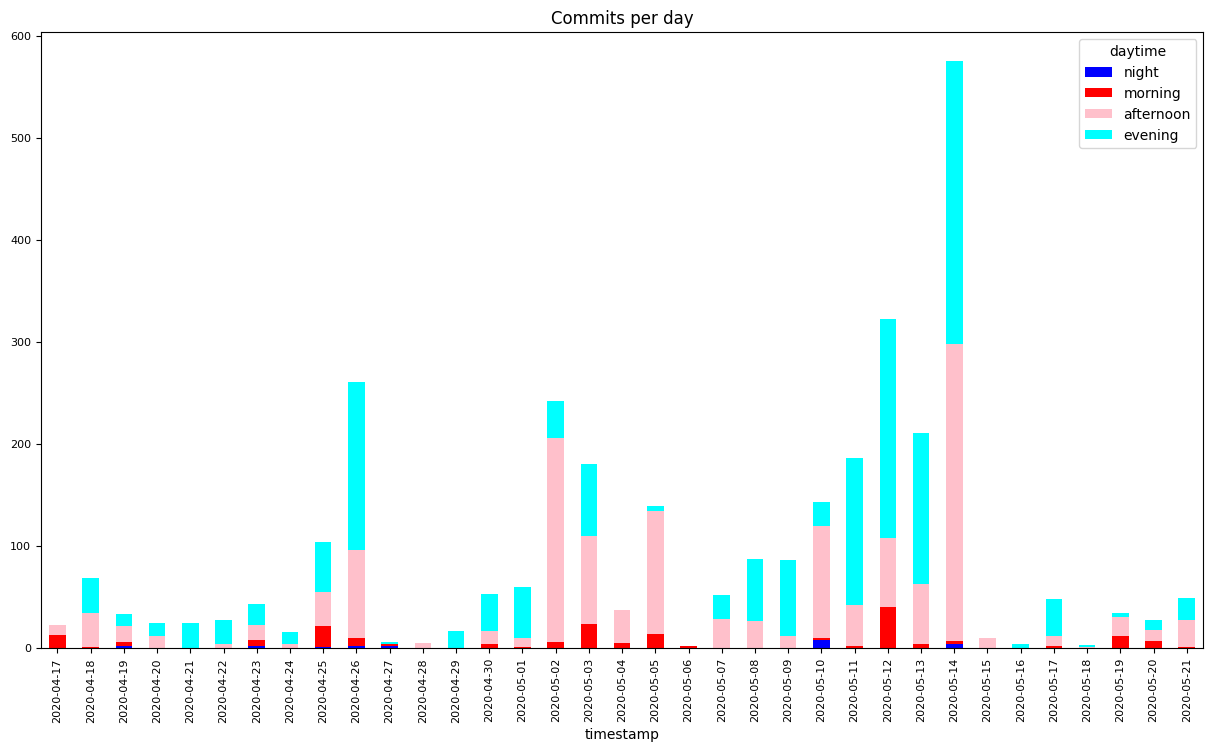

In [133]:
df.plot.bar(fontsize=8, figsize=(15, 8), title='Commits per day', rot=90, color=['blue', 'red', 'pink', 'cyan'], style=['o-.', '--'], stacked=True)

## “When do our users usually commit the labs: in the night, morning, afternoon, or evening?”, the answer is the two most common periods.

In [134]:
d = {"datetime": ['night', 'morning', 'afternoon', 'evening'], "commits": [df['night'].sum(), df['morning'].sum(), df['afternoon'].sum(), df['evening'].sum()]}
df1 = pd.DataFrame(data=d)
df1.sort_values(by=['commits'], inplace=True, ascending=False)
lst = df1['datetime'].loc[:2].to_list()
print(f"The answer is: {lst[0]} and {lst[1]}")

The answer is: evening and afternoon


In [135]:
df2 = pd.DataFrame(df)
df2['commits'] = df['night'] + df['morning'] + df['afternoon'] + df['evening']
df2.sort_values(by=['commits'], inplace=True, ascending=False)
day = df2.index[0].strftime("%Y-%m-%d")
print(f"{day} has the most number of commits")

2020-05-14 has the most number of commits


In [136]:
df4 = pd.DataFrame(df)
df4['commits'] = df['night'] + df['morning'] + df['afternoon'] + df['evening']
df4.sort_values(by=['commits'], inplace=True, ascending=False)
df4 = df4[df4['afternoon'] < df4['evening']]
day = df4.index[0].strftime("%Y-%m-%d")
print(f"{day} has the most number of commits and at the same time, its number of commits in the evening is higher than in the afternoon")

2020-05-12 has the most number of commits and at the same time, its number of commits in the evening is higher than in the afternoon


In [137]:
con.close()